# dev tip patching
Tim Tyree<br>
12.21.2020

In [1]:
from lib.my_initialization import *

# from lib.my_initialization import *
from lib.utils.utils_traj import *
from lib.viewer import *
import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# plot the largest difference in lifetime event
- and then, cyclethrough until you find birth/death pair making a line in pbc


# TODO(later): use IMR to backtrack the buffer (or else extrapolate the tip trajectories?) to get a closer look at the nonlinear dynamics of the FK model when a spiral tip is born.

# TODO(later): augment lifetime estimates to submillasecond "precision" by using quadratic extrapolation of a constant assumed acceleration at birth or death.

# TODO(later): plot each trajectory as starting at the origin and ending on the positive x-axis

# compute and plot the histogram of ranges at annihilation/creation

In [342]:
print(input_file_name)
print('\nthe apparent distribution of ranges at creation has')
print(DS*df_out['r0'].describe())
print('\nthe apparent distribution of ranges at death has')
print(DS*df_out['rT'].describe())

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv

the apparent distribution of ranges at creation has
count    37.400000
mean      0.132630
std       0.098758
min       0.000911
25%       0.072327
50%       0.117605
75%       0.172951
max       1.880284
Name: r0, dtype: float64

the apparent distribution of ranges at death has
count    37.400000
mean      0.116095
std       0.075923
min       0.000911
25%       0.066309
50%       0.103494
75%       0.152817
max       0.614211
Name: rT, dtype: float64


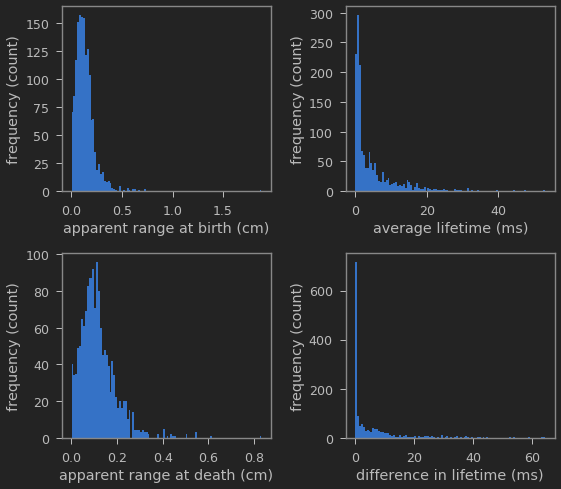

In [294]:
# sns.pairplot(df_out[['r0','Tavg','Tdiff']])
fig, axs = plt.subplots(2,ncols=2)
ax = axs[0,0]
ax.hist(DS*df_out['r0'], bins=100)
ax.set_xlabel('apparent range at birth (cm)')
ax.set_ylabel('frequency (count)')

ax = axs[1,0]
ax.hist(DS*df_out['rT'], bins=100)
ax.set_xlabel('apparent range at death (cm)')
ax.set_ylabel('frequency (count)')

ax = axs[0,1]
ax.hist(DS*df_out['Tavg'], bins=100)
ax.set_xlabel('average lifetime (ms)')
ax.set_ylabel('frequency (count)')

ax = axs[1,1]
ax.hist(DS*df_out['Tdiff'], bins=100)
ax.set_xlabel('difference in lifetime (ms)')
ax.set_ylabel('frequency (count)')

plt.tight_layout()
plt.show()



In [343]:
df_out = pd.DataFrame({
    'pid':pid_lst,
    'pid_birthmate':pid_other_lst,
    'pid_deathmate':pid_death_lst,
    'r0':r0_lst,
    'rT':rT_lst,
    'Tavg':Tavg_lst,
    'Tdiff':Tdiff_lst
})
df_interactions = df_out.copy()

#TODO: record s and dsdt
#TODO: save df_interactions for one trial
#TODO: compute df_interactiions for all trials
df_interactions.head()

,pid,pid_birthmate,pid_deathmate,r0,rT,Tavg,Tdiff
0,1401,1400,1494,7.252492,5.439963,1764.5,2163.0
1,80,81,172,5.061835,17.380403,1369.0,2578.0
2,654,653,763,14.372544,4.110398,1264.5,2527.0
3,226,225,306,2.103557,1.626507,2123.0,780.0
4,1384,1385,1447,8.098884,4.647631,1267.5,2363.0


In [290]:
#TODO: loop over all trajectories, recording diff. in lifetime, avg. lifetime, and range at creation
len(pid_longest_lst)

1536

In [289]:
#list of length sorted trajectories
df = pd.read_csv(input_file_name)
df.reset_index(inplace=True)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values)#[:n_tips])
DS = 5./200.
#compute lifetime_of_sibling
pid2counter = 1

r0_lst = []; rT_lst=[]; Tdiff_lst = []; Tavg_lst = []; pid_lst = []; pid_other_lst = []; pid_death_lst=[]
for pid in pid_longest_lst:
    # pid = pid_longest_lst[0]
    # - DONE: identify the birth mate of a given spiral tip
    d = f[f.particle == pid]
    #identify the death partner
    # nearest_pid, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
    #identify the birth partner of that given tip
    pid_partner, reaction_distance_birth, t_of_life = identify_birth_partner(df=f,pid=pid)
    pid_partner_death, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
    d_other = f[f.particle==pid_partner]

    # compute lifetimes of ^those spiral tips. compute average_lifetime.
    absdiff,avgval=comp_lifetime_diff_and_avg(d,d_other)
    
    r0_lst.append (  float(reaction_distance_birth)  ) 
    rT_lst.append (  float(reaction_distance_death)  ) 
    Tdiff_lst.append  (  float(absdiff)  )
    Tavg_lst.append  (  float(avgval)   )
    pid_lst.append  ( int(pid) )
    pid_other_lst.append  (  int(pid_partner)  )
    pid_death_lst.append  (  int(pid_partner_death))
    
beep(10)

0

- DONE: identify the birth mate of a given spiral tip
- DONE: compute lifetime of ^that spiral tip. compute average_lifetime.
- DONE: compute lifetime of the given spiral tip. compute average_lifetime.
- DONE: plot a histogram of differences_in_lifetime
- DONE: plot differences_in_lifetime versus average lifetime

In [270]:
# def comp_lifetime_diff_and_avg(d,d_other):
#     '''absdiff,avgval=comp_lifetime_diff_and_avg(d,d_other)'''
#     tmin_other = d_other.t.min()
#     tmax_other = d_other.t.max()
#     lifetime_other = tmax_other-tmin_other
#     tmin_other = d.t.min()
#     tmax_other = d.t.max()
#     lifetime_self = tmax_other-tmin_other
#     absdiff = np.abs(lifetime_self-lifetime_other)
#     avgval = lifetime_self/2+lifetime_other/2
#     return absdiff,avgval

In [427]:
# def comp_lifetime(d):
#     '''lifetime_self=comp_lifetime(d)'''
#     tmin_other = d.t.min()
#     tmax_other = d.t.max()
#     lifetime_self = tmax_other-tmin_other
#     #     absdiff = np.abs(lifetime_self-lifetime_other)
#     #     avgval = lifetime_self/2+lifetime_other/2
#     return lifetime_self

# select the longest tip from a given folder

In [190]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [191]:
# #find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()

In [192]:
#select the longest n trajectories
n_tips=1
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv"
df = pd.read_csv(input_file_name)
df.reset_index(inplace=True, drop=True)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values[:n_tips])

In [193]:
pid = pid_longest_lst[0]
d = df[df.particle==pid].copy()

In [194]:
#identify any jumps that aren't accross the boundary
x_values = d.x.values
y_values = d.y.values
jumps_bndry, spd_lst = find_jumps(x_values,y_values,width=200,height=200, DS=5/200,DT=1, jump_thresh=None)
d['spd'] = np.hstack([spd_lst,np.nan])
# jumps_all = 
# jumps_not_bndry = 

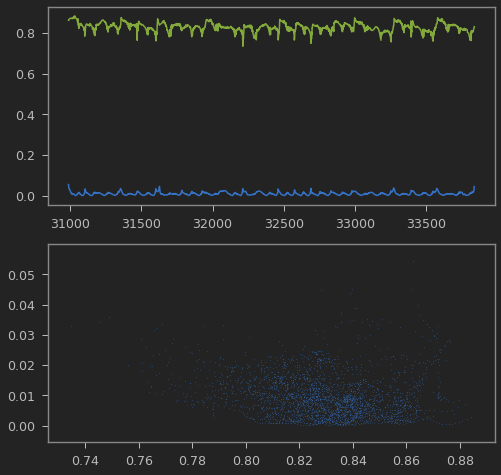

In [195]:
t_values = d.t.values
fig, axs = plt.subplots(2,figsize=(8,8))
ax = axs[0]
ax.plot(t_values[:-1],spd_lst)
ax.plot(t_values,d.s.values)
ax = axs[1]
ax.scatter(d.s.values[:-1],spd_lst,s=1,alpha=0.3)
plt.show()

/home/timothytyree/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


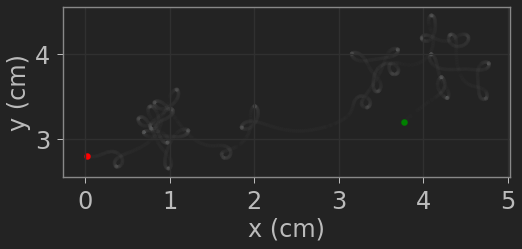

In [196]:
fig = PlotFlowerTrajectories(d, saving=False, col='theta')#,vmin=0,vmax=np.pi)
plt.show()

In [197]:
sum(d.theta.isna().values)/d.theta.isna().values.shape[0]

0.05374077976817703

In [198]:
d.loc[d.theta.isna(),'theta'] = -9999

In [199]:
d.loc[d.theta>-9000,'theta'].describe()

count    2694.000000
mean        1.853739
std         0.388804
min         0.342810
25%         1.612205
50%         1.852545
75%         2.115868
max         2.993640
Name: theta, dtype: float64

# Simplest patching based only on x,y proximity

# TODO: add ^this traj. to a list of good trajectories

# TODO: automate ^this simplest patching

# TODO: cycle through trajectories, looking for an ugly one

# pairplot results


- no clear functional relationship between spiral tip speed and local EP variables
- theta is most strongly correlated as slight values
- no major outliers in the given trajectory, d
- major outliers amongst all spiral tip locations
    - suggests virtual spiral tips might actually be identifiable


In [20]:
import seaborn as sns

In [21]:
# # kw = {'vars':['spd','v','f','s','dvdt','dfdt','dsdt','theta']}
# # sns.pairplot (d[d.theta>=0], **kw)

# kw = {'vars':['v','f','s','dvdt','dfdt','dsdt','theta']}
# sns.pairplot (df[df.theta>=0], **kw)

### visualize difference between dvdt, dfdt, and dsdt, and their comoving counterparts

In [58]:
#list of length sorted trajectories
df = pd.read_csv(input_file_name)
df.reset_index(inplace=True)
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values)#[:n_tips])

In [23]:
# DT = 1. #ms per observation frame
# #initialize data columns
# f = df.copy()
# f['DvDT'] = np.nan; f['DfDT'] = np.nan; f['DsDT'] = np.nan

# #loop over trajectories
# for pid in pid_longest_lst:
#     d = f[f.particle==pid]
#     dd = d.diff().shift(-1)
#     f.loc[f.particle==pid,'DvDT'] = dd['v']/DT
#     f.loc[f.particle==pid,'DfDT'] = dd['f']/DT
#     f.loc[f.particle==pid,'DsDT'] = dd['s']/DT

In [24]:
# # kw = {'vars':['v','f','s','dvdt','DvDT','dfdt','DfDT','dsdt','DsDT']}
# kw = {'vars':['dvdt','DvDT','dfdt','DfDT','dsdt','DsDT']}
# sns.pairplot (f[f.theta>=0], **kw)
# plt.show()

__results__ from comparing local static rates, dfdt with local comoving rates, DfDt
- no variation in DfDt while there is significant variation in dfdt.  Similarly for DsDt and dsdt, where
    - varies alot: DsDt
    - varies not much at all: dsdt = -0.001 except for clear outliers where dsdt>-0.0005

In [27]:
# THESE TIPS ARE SUS
# looking at these outliers, where dsdt>-0.0005
f[f.dsdt>-0.0005].groupby('particle').describe()

index                                             t       ...  \
         count  mean std   min   25%   50%   75%   max count mean  ...   
particle                                                           ...   
1          1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0   1.0  0.0  ...   
2          1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0   1.0  0.0  ...   
3          1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0   1.0  0.0  ...   
4          1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0   1.0  0.0  ...   
13         1.0  13.0 NaN  13.0  13.0  13.0  13.0  13.0   1.0  0.0  ...   
16         1.0  16.0 NaN  16.0  16.0  16.0  16.0  16.0   1.0  0.0  ...   
17         1.0  17.0 NaN  17.0  17.0  17.0  17.0  17.0   1.0  0.0  ...   
21         1.0  21.0 NaN  21.0  21.0  21.0  21.0  21.0   1.0  0.0  ...   

             DfDT           DsDT                                          \
              75%      max count     mean std      min      25%      50%   
particle                                                                   
1             NaN      NaN   0.0      NaN NaN      NaN      NaN      NaN   
2         0.05639  0.05639   1.0 -0.03307 NaN -0.03307 -0.03307 -0.03307   
3         0.01668  0.01668   1.0 -0.00033 NaN -0.00033 -0.00033 -0.00033   
4        -0.19480 -0.19480   1.0 -0.02101 NaN -0.02101 -0.02101 -0.02101   
13       -0.08601 -0.08601   1.0  0.00020 NaN  0.00020  0.00020  0.00020   
16            NaN      NaN   0.0      NaN NaN      NaN      NaN      NaN   
17       -0.24162 -0.24162   1.0 -0.03328 NaN -0.03328 -0.03328 -0.03328   
21       -0.27467 -0.27467   1.0 -0.00029 NaN -0.00029 -0.00029 -0.00029   

                            
              75%      max  
particle                    
1             NaN      NaN  
2        -0.03307 -0.03307  
3        -0.00033 -0.00033  
4        -0.02101 -0.02101  
13        0.00020  0.00020  
16            NaN      NaN  
17       -0.03328 -0.03328  
21       -0.00029 -0.00029  

[8 rows x 160 columns]

### TODO: visualize the flower plots for ^these particles

In [30]:
pid_lst_sus = f[f.dsdt>-0.0005].groupby('particle').describe().index.values
pid = pid_lst_sus[1]#just one dot[0]
d = f[f.particle==pid]
d.head()

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,...,f,s,dvdt,dfdt,dsdt,frame,particle,DvDT,DfDT,DsDT
2,2,0.0,32,199.49921,181.74264,3.14045,1.91093,0.00148,1.90739,-0.00013,...,0.20640,0.88549,-0.38067,-0.00363,-0.00036,0,2,-0.26332,0.05639,-0.03307
39,39,1.0,22,199.67238,167.55416,3.02014,1.72222,0.14178,1.84839,-0.01435,...,0.26279,0.85242,0.02795,-0.02017,-0.00107,1,2,-0.02517,0.20366,0.03855
61,61,2.0,22,199.90095,166.12235,2.72346,1.47576,0.43124,1.87367,-0.05208,...,0.46645,0.89097,0.06755,-0.03580,-0.00111,2,2,0.06159,-0.45895,-0.08726
92,92,3.0,20,0.16627,165.47654,2.81541,2.00587,1.00000,-12.00334,1.00994,...,0.00750,0.80371,-0.01203,-0.00058,-0.00100,3,2,-0.01073,-0.00048,-0.00085
108,108,4.0,20,0.38329,165.15153,2.57167,0.97560,1.00000,-11.35515,1.02767,...,0.00702,0.80286,0.00751,-0.00054,-0.00100,4,2,0.01561,-0.00044,-0.00096


ValueError: zero-size array to reduction operation minimum which has no identity

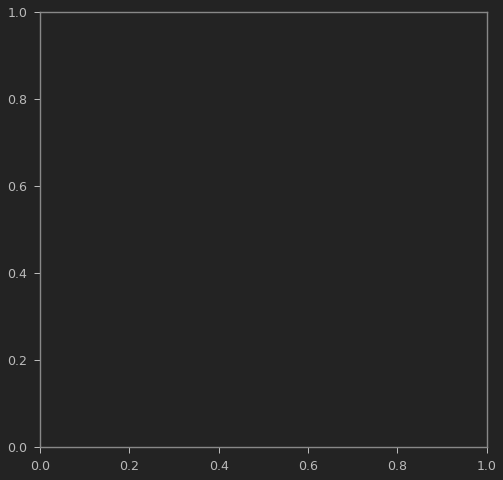

In [29]:
fig = PlotFlowerTrajectories(d, saving=False, col='t')#,vmin=0,vmax=np.pi)
plt.show()

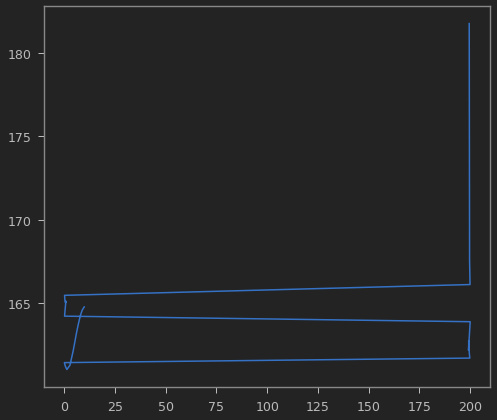

In [31]:
x_values = d.x.values
y_values = d.y.values
plt.plot(x_values,y_values)
plt.show()

# implement simple tracking algorithm.  No... just work from the longest trajectories first
trackpy is giving me trajectories that have single points or are otherwise empty.

# TODO: compute particle2 for all rows
DONE: naive check for whether this traj should be extended with another trajectory

In [536]:
# def get_neighboring_tip(xy_self,xy_others, pid_others):
#     """nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others)"""
#     nearest_pid  =  pid_others[0]
#     nearest_dist = distance_L2_pbc ( xy_others[0], xy_self[0])
#     if len(pid_others)>1:
#         for j,pid_other in enumerate(pid_others):
#             dist = distance_L2_pbc ( xy_others[j], xy_self[0])
#             if dist<nearest_dist:
#                 nearest_dist = dist
#                 nearest_pid  = int(pid_other)
#     return nearest_pid, nearest_dist

# def get_tips_in_range(xy_self,xy_others, pid_others, dist_thresh=10):
#     """pid_lst = get_tips_in_range(xy_self,xy_others, pid_others, dist_thresh=10)"""
#     pid_lst = []
#     if len(pid_others)>0:
#         for j,pid_other in enumerate(pid_others):
#             dist = distance_L2_pbc ( xy_others[j], xy_self[0])
#             if dist<dist_thresh:
#                 pid_lst.append (  int(pid_other) )
#     return pid_lst

In [537]:
# def identify_death_partner(df,pid):
#     f = df
#     d = f[f.particle == pid]
#     #identify the death partner
#     x,y,t = d.tail(1)[['x','y','t']].values.T
#     #at the time of birth/death, the suspects were...
#     x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
#     xy_others = np.vstack((x_others,y_others)).T
#     xy_self = np.array((x,y)).T
#     nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others,pid_others)
#     return nearest_pid, nearest_dist, t

# def identify_birth_partner(df,pid):
#     f = df
#     d = f[f.particle == pid]
#     #identify the birth partner
#     x,y,t = d.head(1)[['x','y','t']].values.T
#     #at the time of birth/death, the suspects were...
#     x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
#     xy_others = np.vstack((x_others,y_others)).T
#     xy_self = np.array((x,y)).T
# #     return xy_self, xy_others
#     nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others, pid_others)
#     return nearest_pid, nearest_dist, t


In [538]:
#compute the L2_pbc distance to each other
distance_L2_pbc = get_distance_L2_pbc(width=200,height=200)
DS = 5./200.
#TODO: insert comparable_velocity filtration

In [546]:
f['particle2'] = np.nan
pid = pid_longest_lst[0]
pid2counter = 1
d = f[f.particle == pid]

#TODO: insert breaking up d into valid chunks
#Hint: use old jump routine OR just make it again

#identify the death partner
nearest_pid, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
#identify the birth partner of that death partner
pid_alternative, reaction_distance_birth, t_of_life = identify_birth_partner(df=f,pid=nearest_pid)
lifetime_of_killer = float(t_of_death-t_of_life)
print(f"the lifetime of the killer was {lifetime_of_killer:.0f} ms!")
lifetime_thresh = 50
boo = lifetime_of_killer>lifetime_thresh
#TODO: insert comparable_velocity filtration

the lifetime of the killer was 92 ms!


In [547]:
print(f'...at the time of death of tip num. {pid}...')
print(f"...the nearest tip was {nearest_pid}, which was only {reaction_distance_death*DS:.2f}cm away!")
print(f"...However,")
print(f'...at the time of birth of tip num. {nearest_pid}...')
print(f"...the nearest tip was {pid_alternative}, which was only {reaction_distance_birth*DS:.2f}cm away!")
print(f"...the lifetime of the killer was {lifetime_of_killer:.0f} ms!")
print("is ^this lifetime more than the characteristic timescale of ballistic motion, ~50ms?")
lifetime_thresh = 50
boo = lifetime_of_killer>lifetime_thresh
print(boo)
if boo:
    print(f"thus, keep the tip")
else:
    print(f"thus, do not keep the tip")
#TODO: compute the forward patch of those two trajectories
    print(f"is the change in velocities sufficiently small?")
    boo2 = np.nan
    print(boo2)

...at the time of death of tip num. 1401...
...the nearest tip was 1494, which was only 0.14cm away!
...However,
...at the time of birth of tip num. 1494...
...the nearest tip was 1495, which was only 0.27cm away!
...the lifetime of the killer was 92 ms!
is ^this lifetime more than the characteristic timescale of ballistic motion, ~50ms?
True
thus, keep the tip


In [434]:
pid

1229

In [256]:
# print("is ^this lifetime more or less than the characteristic timescale of ballistic motion, ~50ms

In [452]:
f = df
d = f[f.particle == pid]
#to identify the birth partner
x,y,t = d.tail(1)[['x','y','t']].values.T
#first identify all other tips at time of birth
x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
xy_others = np.vstack((x_others,y_others)).T
xy_self = np.array((x,y)).T
nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others, pid_others)

#visualize the scene of the crime...
j = int(np.argwhere(nearest_pid==pid_others))
x_other = x_others[j]
y_other = y_others[j]
DT=1.
x_others_next,y_others_next,pid_others_next = f[(f.t==float(t+DT))&(f.particle!=pid)][['x','y','particle']].values.T
print(len(x_others),len(x_others_next))

plt.scatter(x_others_next,y_others_next,c='yellow', label=None, marker='*',s=5000,alpha=0.5)
plt.scatter(x_others,y_others,c='yellow', label=None, marker='*',s=500)


plt.scatter(x,y,c='red', label='death of given tip', marker='*',s=500)
plt.scatter(x_other,y_other,c='green', label='death of death mate', marker='*',s=500)
plt.axis([0,200,0,200])
plt.legend()
plt.show()

13 10


In [259]:
nearest_dist

7.252492445366628

In [260]:
#they are indeed 5 pixels appart. a very small distance...  

In [261]:
# but who is the sibling of the killer??

In [262]:
#TODO: wrap the above into a function and test it on finding the sibling of the killer.

# rules for when to add: add when lifetime_of_killer is sufficiently short, make the patch with either the forward preference or the backward preference patch, 

In [548]:
#compute the L2_pbc distance to each other
distance_L2_pbc = get_distance_L2_pbc(width=200,height=200)
DS = 5./200.

In [612]:
#list of length sorted trajectories
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv"
f = pd.read_csv(input_file_name)
f.reset_index(inplace=True, drop=True)
s = f.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values)#[:n_tips])
# distance_L2_pbc = get_distance_L2_pbc(width=200,height=200)
f['particle2'] = -9999#np.nan
# f.loc[f.particle==pid].particle2 = f[f.particle==pid].particle2.astype({'particle2':'int32'})

DS = 5./200.
#TODO: break the trajectory up into valid chunks


#compute lifetime_of_killer
pid = pid_longest_lst[0]
pid2counter = 1
d = f[f.particle == pid]
#identify the death partner
nearest_pid, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
#identify the birth partner of that death partner
pid_alternative, reaction_distance_birth, t_of_life = identify_birth_partner(df=f,pid=nearest_pid)
lifetime_of_killer = float(t_of_death-t_of_life)

# if the killer is long lived,
lifetime_thresh = 50
boo = lifetime_of_killer>lifetime_thresh
# copy particle into particle2 and end iteration for this attention head
if boo:
    # the tip must be valid, so copy particle to particle2 or 
    f.loc[f.particle==pid,'particle2'] = f.loc[f.particle==pid,'particle']
else:
    #a short lifetime deathmate is present a nontrivial patch might need to be made
    #comparable_velocity filtration
    boo2 = comparable_velocities(d,d_alt,angle_threshold = np.pi/4)
    if boo2:
        # patch the two tips 
        d_self = f[f.particle == pid]
        d_alt = f[f.particle == pid_alternative]
        #backward consistent jump
        f.particle2 = d_self.particle
        f.particle2 = d_alt.particle
        #forward consistent jump
        f.particle2 = d_alt.particle
        f.particle2 = d_self.particle

# and assert there's only_one_row_per_frame
# assert(only_one_row_per_frame)

In [550]:
index_values_a = f[f.particle == pid].index.values
t_values_a = f[f.particle == pid].t.values
index_values_b = f[f.particle == pid_alternative].index.values
t_values_b = f[f.particle == pid_alternative].t.values

In [299]:
print('the apparent distribution of ranges at death has')
print(DS*df_out['rT'].describe())

the apparent distribution of ranges at death has
count    38.400000
mean      0.115427
std       0.077636
min       0.000911
25%       0.065948
50%       0.102601
75%       0.150481
max       0.832075
Name: rT, dtype: float64


In [544]:
# #copy the values over in numpy.
# np.max(t_values_a),np.max(t_values_b)
# if np.min(t_values_a)>np.min(t_values_b):
#     #begin with earliest t_values_b
#     pass

In [267]:
# # boo = lifetime_of_killer>lifetime_thresh
# # # copy particle into particle2 and end iteration for this attention head
# # if boo:
# #     f.loc[f.particle==pid,'particle2'] = f.loc[f.particle==pid,'particle']

# d_self = f[f.particle == pid]
# d_alt = f[f.particle == pid_alternative]
# #backward consistent jump
# f.particle2 = d_self.particle
# f.particle2 = d_alt.particle
# #forward consistent jump
# f.particle2 = d_alt.particle
# f.particle2 = d_self.particle

In [545]:
# f[f.particle2==pid].particle2

# TODO(much later): ground up tip filtering from difference of lifetime  from birth mate

# visualize the interactions at the birth and death of a given tip

In [381]:
pid,pid_birthmate = df_birth_pairs.sort_values('Tdiff', ascending=True).head(1)[['pid','pid_birthmate']].values.T.flatten()
# pid,pid_birthmate = (81, 80)

In [382]:
f = df
d = f[f.particle == pid]

#to identify the death partner
x,y,t = d.tail(1)[['x','y','t']].values.T
#first identify all other tips at time of death
x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
xy_others = np.vstack((x_others,y_others)).T
xy_self = np.array((x,y)).T
#find the nearest one, and call it the death partner
nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others, pid_others)
pid_deathmate = nearest_pid
#visualize the scene of the crime...
j = int(np.argwhere(nearest_pid==pid_others))
x_dm = x_others[j]
y_dm = y_others[j]
x_d = x; y_d = y

#TODO: to identify the birth mate of death partner
x,y,t = d.tail(1)[['x','y','t']].values.T
#first identify all other tips at time of death
x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
xy_others = np.vstack((x_others,y_others)).T
xy_self = np.array((x,y)).T
#find the nearest one, and call it the death partner
nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others, pid_others)
pid_deathmate = nearest_pid
#visualize the scene of the crime...
j = int(np.argwhere(nearest_pid==pid_others))
x_dm = x_others[j]
y_dm = y_others[j]
x_d = x; y_d = y

#to identify the birth partner
x,y,t = d.head(1)[['x','y','t']].values.T
#first identify all other tips at time of birth
x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
xy_others = np.vstack((x_others,y_others)).T
xy_self = np.array((x,y)).T
nearest_pid, nearest_dist = get_neighboring_tip(xy_self,xy_others, pid_others)
pid_birthmate = nearest_pid
#visualize the scene of the birth...
j = int(np.argwhere(nearest_pid==pid_others))
x_bm = x_others[j]
y_bm = y_others[j]
x_b = x; y_b = y

In [396]:
pid_Tdiff_sorted_lst = df_interactions.sort_values('Tdiff', ascending=True)['pid'].values.T.flatten()

In [479]:
pid = pid_Tdiff_sorted_lst[1]#looks normal[0]
#identify the interactions at the birth/death of this given tip
dfi = df_interactions[df_interactions.pid==pid]
pid_birthmate=dfi['pid_birthmate'].values[0]
pid_deathmate=dfi['pid_deathmate'].values[0]
Tavg=dfi['Tavg'].values[0]
Tdiff=dfi['Tdiff'].values[0]

d = df[(df.particle==pid)]
dbm = df[(df.particle==pid_birthmate)]
ddm = df[(df.particle==pid_deathmate)]

print(dbm.t.size,d.t.size,ddm.t.size)
LT_thresh = 5
boo = ddm.t.size<LT_thresh
if boo:
    print('this tip died with a very short lived tip, which was probably a virtual spiral tip... Patching is needed!')

43 43 1
this tip died with a very short lived tip, which was probably a virtual spiral tip... Patching is needed!


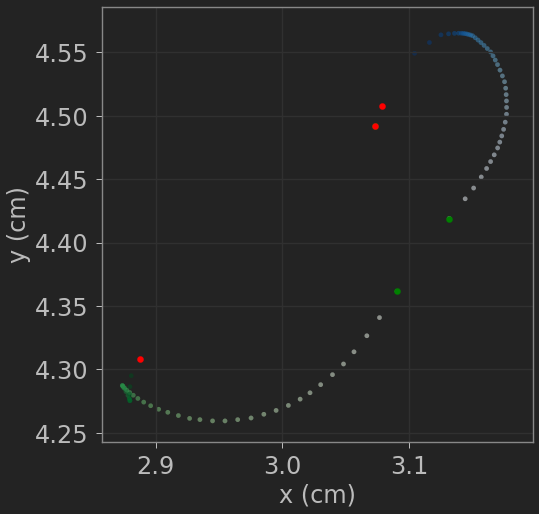

In [480]:
from lib.viewer.PlotFlowers import *

# d = df[(df.particle==pid)|(df.particle==pid_birthmate)]
ax = PlotFlowerTrajectories(d, saving=False, col='t',alpha=.5, cmap='Blues')
ax = PlotFlowerTrajectories(dbm, saving=False, col='t',alpha=.5,ax=ax, cmap='Greens')
ax = PlotFlowerTrajectories(ddm, saving=False, col='t',alpha=.5,ax=ax, cmap="Reds")

# ax.scatter(x=ddm.x.values[0]*DS,y=dbm.y.values[0]*DS, c='b',marker='*')#, size=500)
plt.show()

# visualize all tips that are close by at the time of death for the given tip

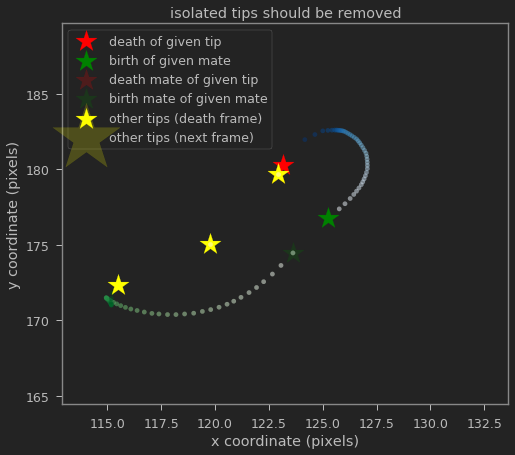

In [526]:
pad =10#200#10#50

c_values = d.t.values;plt.scatter(d.x.values,d.y.values, s=20, c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap='Blues',alpha=0.5)
c_values = ddm.t.values;plt.scatter(ddm.x.values,ddm.y.values, s=20, c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap='Reds',alpha=0.5)
c_values = dbm.t.values;plt.scatter(dbm.x.values,dbm.y.values, s=20, c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap='Greens',alpha=0.5)

x_d,y_d,t_d = d.tail(1)[['x','y','t']].values.T
x_b,y_b,t_b = d.head(1)[['x','y','t']].values.T
x_others,y_others,pid_others = df[(df.t==float(t_d))&(df.particle!=pid)][['x','y','particle']].values.T

plt.scatter(x_d,y_d,c='red', label='death of given tip', marker='*',s=500)
plt.scatter(x_b,y_b,c='green', label='birth of given mate', marker='*',s=500)

x_dm,y_dm,t_dm = ddm.tail(1)[['x','y','t']].values.T
x_bm,y_bm,t_bm = dbm.head(1)[['x','y','t']].values.T

plt.scatter(x_dm,y_dm,c='red', label='death mate of given tip', marker='*',s=500,alpha=0.2)
plt.scatter(x_bm,y_bm,c='green', label='birth mate of given mate', marker='*',s=500,alpha=0.2)

x_others,y_others,pid_others = df[(df.t==float(t))&(df.particle!=pid)][['x','y','particle']].values.T
#previous frame: x_others_next,y_others_next,pid_others_next = df[(df.t==float(t-DT))][['x','y','particle']].values.T
x_others_next,y_others_next,pid_others_next = df[(df.t==float(t+DT))][['x','y','particle']].values.T
#excluding the now dead tip: x_others_next,y_others_next,pid_others_next = df[(df.t==float(t+DT))&(df.particle!=pid)][['x','y','particle']].values.T
plt.scatter(x_others,y_others,c='yellow', label='other tips (death frame)', marker='*',s=500)
plt.scatter(x_others_next,y_others_next,c='yellow', label='other tips (next frame)', marker='*',s=5000,alpha=0.2)
for p in pid_nearby:#pid_others:
    dd = df[df.particle==p]
    c_values = dd.t.values;
    plt.scatter(dd.x.values,dd.y.values, s=20, c=c_values, vmin = np.min(c_values), vmax = np.max(c_values), cmap='Reds',alpha=0.5)

plt.xlabel('x coordinate (pixels)')
plt.ylabel('y coordinate (pixels)')
plt.axis([np.min((x_dm,x_bm))-pad,np.max((x_dm,x_bm))+pad,np.min((y_dm,y_bm))-pad,np.max((y_dm,y_bm))+pad])
plt.title('isolated tips should be removed')
# plt.scatter(x_others,y_others,c='yellow', label='all tips at time of death', marker='*',s=500)
# plt.axis([0,200,0,200])
plt.legend()
plt.show()

In [490]:
comp_lifetime(d),comp_lifetime(dbm),comp_lifetime(ddm)

(42.0, 42.0, 0.0)

### __result__: the EP state of virtual tips appears indistinguishable from normal tips
- note: the variable f might be small for virtual tips according to this example, but the 1sigma confidence intervals definately overlap between virtual and normal spiral tips.

In [529]:
#visualize these other two virtual tips.  

# d = f[f.particle == pid]
#identify the death partner
x,y,t = d.tail(1)[['x','y','t']].values.T
#at the time of birth/death, the suspects were...
x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
xy_others = np.vstack((x_others,y_others)).T
xy_self = np.array((x,y)).T

pid_nearby = get_tips_in_range(xy_self,xy_others, pid_others, dist_thresh=10)


In [530]:
dd = df[(df.particle == pid_nearby[0])|(df.particle == pid_nearby[1])]
dd

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
225136,227148,26153.0,14,122.90701,179.68443,2.92423,4.57228,-1.44851,3.21952,-0.51615,0.53614,0.02774,0.80053,-0.00078,-0.00213,-0.00100,26153,1233
225141,227153,26153.0,14,119.78851,175.04786,NaN,-1.19704,2.50263,-0.25982,1.86349,0.66775,0.18981,0.86055,-0.00471,-0.01457,-0.00108,26153,1232


In [531]:
#compare to d
d.describe().T[['mean','std']].T

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
mean,226907.441860,26132.000000,11.209302,126.180238,180.937698,2.091714,-235.359014,168.614223,2.667447,-0.163642,0.501391,0.017824,0.821455,0.000053,-0.001368,-0.001027,26132.000000,1229.0
std,140.260354,12.556539,1.081404,0.856363,1.730595,0.360636,1557.187993,1104.298151,16.195137,11.349926,0.046588,0.018323,0.021741,0.001747,0.001406,0.000027,12.556539,0.0


In [532]:
# - TODO: check ^this by comparing to a random tip
df[df.particle == 1000].describe().T[['mean','std']].T

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
mean,192071.648749,21714.000000,9.781279,35.174435,128.413197,1.888073,-0.336549,1.786823,2.075302,-0.459141,0.501463,0.055815,0.820462,0.00014,-0.004284,-0.001026,21714.000000,1000.0
std,2739.420212,311.624774,3.507265,20.539278,24.878653,0.371513,38.350906,13.910587,87.931975,54.506446,0.039053,0.034685,0.024052,0.00189,0.002662,0.000030,311.624774,0.0


### print bluff for given tip

In [535]:
# print(t_d-t_b,t_dm-t_b,t_d-t_bm)
print(f"pid_self:{pid}\npid_birthmate:{pid_birthmate}\npid_deathmate:{pid_deathmate}\n")
print(f"lifetime_self:{comp_lifetime(d)}ms\nlifetime_birthmate:{comp_lifetime(dbm)}ms\nlifetime_deathmate:{comp_lifetime(ddm)}ms")

pid_self:1229
pid_birthmate:1228
pid_deathmate:1233

lifetime_self:42.0ms
lifetime_birthmate:42.0ms
lifetime_deathmate:0.0ms


In [431]:
ddm

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
225136,227148,26153.0,14,122.90701,179.68443,2.92423,4.57228,-1.44851,3.21952,-0.51615,0.53614,0.02774,0.80053,-0.00078,-0.00213,-0.001,26153,1233


### WHAT!? Why is there only one entry for the death mate! This must be a virtual spiral tip...
TODO: verify this by plotting all tips in death frame/following frame and color the death pair

In [432]:
ddm

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
225136,227148,26153.0,14,122.90701,179.68443,2.92423,4.57228,-1.44851,3.21952,-0.51615,0.53614,0.02774,0.80053,-0.00078,-0.00213,-0.001,26153,1233


In [433]:
d.tail(1)

,index,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,particle
225140,227152,26153.0,14,123.15735,180.30025,3.07015,8.63867,-4.22021,-2.5794,3.45314,0.482,0.00088,0.78202,0.0002,-0.00007,-0.00098,26153,1229


# WHAT!? Why is the birth mate crossing paths with the given tip immediately after birth??

# velocity comparator filter

In [580]:
# #TODO: insert comparable_velocity filtration
# def comparable_velocities(d,d_alt,angle_threshold = np.pi/4):
#     '''boo = comparable_velocities(d,d_alt,angle_threshold = np.pi/4)'''
#     #DONE: compute mean_tail_velocity of tip to be merged into, d
#     vx = np.mean(d.tail().x.diff().dropna().values)
#     vy = np.mean(d.tail().y.diff().dropna().values)
#     mean_tail_velocity = np.array([vx,vy]).T

#     #the tip to be merged is d_alt
#     #TODO: compute mean_head_velocity of tip to be merged, d_alt
#     vx = np.mean(d_alt.head().x.diff().dropna().values)
#     vy = np.mean(d_alt.head().y.diff().dropna().values)
#     mean_head_velocity = np.array([vx,vy]).T
#     #TODO: compute the angle between these two velocities
#     a = np.dot(mean_head_velocity,mean_tail_velocity)
#     a /= np.linalg.norm(mean_head_velocity)
#     a /= np.linalg.norm(mean_tail_velocity)
#     angle = np.arccos(a)
#     boo = angle<angle_threshold
#     return boo

In [581]:
# print(mean_tail_velocity)
# print(mean_head_velocity)

In [582]:
# pid
# pid=1401

# compute dataframe of all creations/annihilations

In [373]:
# def compare_jump_velocities
# index_values_a = df[f.particle == pid].index.values
# index_values_b = f[f.particle == pid_birthmate].index.values
# dbm.head(1),
d.tail(1),ddm.tail(1)

(         index        t   n          x         y    theta  grad_ux  grad_uy  \
 143941  145953  16025.0  12  111.91464  18.35786  0.65755  1.55598 -2.38171   
 
         grad_vx  grad_vy        v        f        s     dvdt     dfdt   dsdt  \
 143941  1.37822 -1.29614  0.44098  0.03199  0.79959 -0.00315 -0.00245 -0.001   
 
         frame  particle  
 143941  16025       654  ,
          index        t   n          x         y  theta  grad_ux  grad_uy  \
 143945  145957  16025.0  12  114.90123  21.18198    NaN  1.38261 -1.06476   
 
         grad_vx  grad_vy        v        f        s    dvdt     dfdt     dsdt  \
 143945  1.51599 -1.79035  0.41741  0.03178  0.79142 -0.0041 -0.00244 -0.00099   
 
         frame  particle  
 143945  16025       763  )

In [378]:
# def compute_df_interactions(input_file_name,DS=5./200.,)
#     #list of length sorted trajectories
#     df = pd.read_csv(input_file_name)
#     df = df[df.t>100].copy()
#     df.reset_index(inplace=True)
#     s = df.groupby('particle').t.count()
#     s = s.sort_values(ascending=False)
#     pid_longest_lst = list(s.index.values)#[:n_tips])
#     #     DS = 5./200.
#     #compute lifetime_of_sibling
#     #     pid2counter = 1
#     r0_lst = []; rT_lst=[]; Tdiff_lst = []; Tavg_lst = []; pid_lst = []; pid_other_lst = []; pid_death_lst=[]
#     for pid in pid_longest_lst:
#         # pid = pid_longest_lst[0]
#         # - DONE: identify the birth mate of a given spiral tip
#         d = df[df.particle == pid]
#         #identify the death partner
#         # nearest_pid, reaction_distance_death, t_of_death = identify_death_partner(df=f,pid=pid)
#         #identify the birth partner of that given tip
#         pid_partner, reaction_distance_birth, t_of_life = identify_birth_partner(df=df,pid=pid)
#         pid_partner_death, reaction_distance_death, t_of_death = identify_death_partner(df=df,pid=pid)
#         d_other = df[df.particle==pid_partner]

#         # compute lifetimes of ^those spiral tips. compute average_lifetime.
#         absdiff,avgval=comp_lifetime_diff_and_avg(d,d_other)

#         r0_lst.append (  float(reaction_distance_birth)  ) 
#         rT_lst.append (  float(reaction_distance_death)  ) 
#         Tdiff_lst.append  (  float(absdiff)  )
#         Tavg_lst.append  (  float(avgval)   )
#         pid_lst.append  ( int(pid) )
#         pid_other_lst.append  (  int(pid_partner)  )
#         pid_death_lst.append  (  int(pid_partner_death))

#     df_out = pd.DataFrame({
#         'pid':pid_lst,
#         'pid_birthmate':pid_other_lst,
#         'pid_deathmate':pid_death_lst,
#         'r0':r0_lst,
#         'rT':rT_lst,
#         'Tavg':Tavg_lst,
#         'Tdiff':Tdiff_lst
#     })
#     df_interactions = df_out.copy()
#     return df_interactions

0

In [379]:
t_of_death-t_of_life


array([0.])

In [380]:
df_out = pd.DataFrame({
    'pid':pid_lst,
    'pid_birthmate':pid_other_lst,
    'pid_deathmate':pid_death_lst,
    'r0':r0_lst,
    'rT':rT_lst,
    'Tavg':Tavg_lst,
    'Tdiff':Tdiff_lst
})
df_interactions = df_out.copy()

#TODO: record s and dsdt
#TODO: save df_interactions for one trial
#TODO: compute df_interactiions for all trials
df_interactions.head()

,pid,pid_birthmate,pid_deathmate,r0,rT,Tavg,Tdiff
0,1401,1400,1494,7.252492,5.439963,1764.5,2163.0
1,80,81,172,5.061835,17.380403,1369.0,2578.0
2,654,653,763,14.372544,4.110398,1264.5,2527.0
3,226,225,306,2.103557,1.626507,2123.0,780.0
4,1384,1385,1447,8.098884,4.647631,1267.5,2363.0


# visualize a given tip with the ends of its birth-death mates

In [355]:
from lib.viewer.PlotFlowers import *


In [8]:
#list of length sorted trajectories
input_file_name = "/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv"
df = pd.read_csv(input_file_name)
df = df[df.t>100].copy()
df.reset_index(inplace=True)
# df = df[df.t>100].copy()
s = df.groupby('particle').t.count()
s = s.sort_values(ascending=False)
pid_longest_lst = list(s.index.values)#[:n_tips])
DS = 5./200.

No handles with labels found to put in legend.


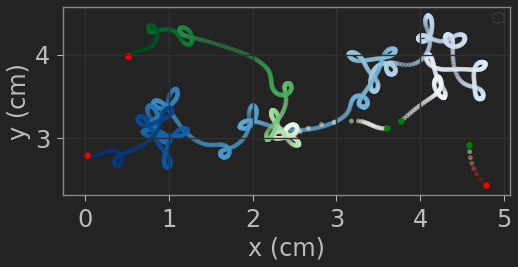

In [575]:

pid=1401
# pid = pid_longest_lst[2]#doesn't make sense[0]
#identify the interactions at the birth/death of this given tip
dfi = df_interactions[df_interactions.pid==pid]
pid_birthmate=dfi['pid_birthmate'].values[0]
pid_deathmate=dfi['pid_deathmate'].values[0]
Tavg=dfi['Tavg'].values[0]
Tdiff=dfi['Tdiff'].values[0]



d = df[(df.particle==pid)]
dbm = df[(df.particle==pid_birthmate)]
ddm = df[(df.particle==pid_deathmate)]
# d = df[(df.particle==pid)|(df.particle==pid_birthmate)]
ax = PlotFlowerTrajectories(d, saving=False, col='t',alpha=.5, cmap='Blues')
ax = PlotFlowerTrajectories(dbm, saving=False, col='t',alpha=.5,ax=ax, cmap='Greens')
ax = PlotFlowerTrajectories(ddm, saving=False, col='t',alpha=.5,ax=ax, cmap="Reds")
ax.legend()
# ax.scatter(x=ddm.x.values[0]*DS,y=dbm.y.values[0]*DS, c='b',marker='*')#, size=500)
plt.show()

### why are none of the deaths matching up!?

# DONE: break the trajectory up into valid chunks


In [616]:
width=200;height=200
jump_thresh=10.
for pid in  pid_longest_lst[:2]:#[2:]:
    d_lst = []
    d_raw = df[df.particle==pid].copy()
    #drop any rows before t=100ms
    #drop any rows that already have a value in particle2
    d_raw.reset_index(inplace=True)#,drop=True)
    x_values ,y_values, c_values = d_raw[['x','y', 't']].values.T
    jump_index_array, spd_lst = find_jumps(x_values,y_values,width=width,height=height, DS=DS,DT=DT, jump_thresh=jump_thresh)#.25)
    jarry=np.hstack([0,jump_index_array])
    Nj = jarry.shape[0]
    for j,ji in enumerate(jarry):
        if j<Nj-1:
            ji_next=jarry[j+1]
            d = d_raw.iloc[ji:ji_next].copy()
        else:
            d = d_raw.iloc[ji:].copy()
#         for ji in jump_index_array:
        #TODO: run particle2 row naming
        d_lst.append(d)
        #TODO: augment pid_counter by one
        pass
beep(3)

0

In [611]:
jump_index_array[0:5]

array([2016, 2144])

# TODO: compare birth-death rates on retracked trajectories resulting from mem=0,2

# TODO: test tip patching routine
- TODO: make the routine functional and interpretable by python
- TODO: plausibility check that the n_tips is still even
- TODO: plausibility check that the n_tips is visually comparable to the raw n_tips

In [2]:
input_file_name = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv'

In [15]:
distance_L2_pbc = get_distance_L2_pbc(width=200,height=200)
df = decompose_trajectories(input_file_name, distance_L2_pbc,DS = 5./200.,
    width=200,height=200,LT_thresh=1,tmin=100, jump_thresh=10.)
df_chunked = df.copy()
print(f"the percent of remaining rows not assigned a chunk index = {100*sum(df.cid<0)/df.t.count():.5f}%")
print(f"the percent of rows that comprise an isolated trajectory = {100*sum(df.groupby('particle').t.count()==1)/df.t.count():.5f}%")
#dropped isolated trajectories

In [21]:
#retrack trajectories
df,pid2counter=retrack_trajectories(df_chunked,distance_L2_pbc,lifetime_thresh = 50,angle_threshold = np.pi/4,LT_thresh=1.,DS = 5./200.,width=200,height=200, jump_thresh=10.)

the percent of remaining rows not assigned a chunk index = 0.00000%
the percent of rows that comprise an isolated trajectory = 0.00000%


/home/timothytyree/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/timothytyree/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


They were pid2 were in { {3.0} }
Whilst pid2counter==39.

d.head()==              t   n          x         y    theta  grad_ux  grad_uy  grad_vx  \
145819  16014.0  12  117.39444  29.15627  0.23243  1.34866 -0.36703  1.31079   
145831  16015.0  12  117.70692  30.26685  0.37559  1.37845 -0.43982  1.28984   
145843  16016.0  12  117.89817  30.89293  0.36254  1.36791 -0.39960  1.27996   
145855  16017.0  12  118.01757  31.26175  1.11216  1.38647 -0.42806  1.22505   
145867  16018.0  12  118.10312  31.55927      NaN  1.37090 -0.37028  1.20795   

        grad_vy        v        f        s     dvdt     dfdt     dsdt  frame  \
145819 -0.21760  0.48573  0.08113  0.82006 -0.00210 -0.00623 -0.00103  16014   
145831 -0.10106  0.46527  0.07980  0.82373 -0.00341 -0.00612 -0.00103  16015   
145843 -0.06478  0.49942  0.08930  0.82788 -0.00004 -0.00685 -0.00103  16016   
145855  0.15432  0.52358  0.09352  0.83000  0.00155 -0.00718 -0.00104  16017   
145867  0.23306  0.54656  0.09564  0.83152  0.00236

/home/timothytyree/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/timothytyree/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
# df[df.particle2==20]
beep(3)

0

In [32]:
#for each particle in ^that list
pid_lst = sorted(set(df[df.cid<0].particle.values))
for pid in pid_lst:
#     print the total number of rows 
#     print(df[df.particle==pid].t.count())
#     print(df[(df.particle==pid)&(df.cid<0)].t.count())
    pass

In [33]:
# pid = pid_lst[11]
# frm_lst = df[(df.particle==pid)&(df.cid<0)].frame.values
# print(len(frm_lst))
# frm = frm_lst[0]
# df[(df.particle==pid)&(df.frame<=frm+3)&(df.frame>=frm-3)]

the first row is sometimes getting missed in chunk_traj

In [34]:
# pid = pid_lst[11]
# width=200;height=200;DS=5./200.;DT=1.
# d_raw = df[df.particle==pid].copy()
# jump_thresh=10.#15.
# #drop any rows before t=100ms
# #drop any rows that already have a value in particle2
# d_raw.reset_index(inplace=True)#,drop=True)
# x_values, y_values, c_values = d_raw[['x','y', 't']].values.T
# jump_index_array_pbc, spd_lst = find_jumps(x_values,y_values,distance_L2_pbc=distance_L2_pbc,width=width,height=height, DS=DS,DT=DT, jump_thresh=None)#.25)
# jump_index_array, spd_lst = find_jumps(x_values,y_values,distance_L2_pbc=distance_L2_pbc,width=width,height=height, DS=DS,DT=DT, jump_thresh=jump_thresh)#.25)
# jump_index_array=sorted(set(jump_index_array).difference(set(jump_index_array_pbc)))
# jarry=np.hstack([jump_index_array,-9999])

In [35]:
# jump_index_array

In [36]:
# jump_index_array_pbc